In [1]:
##### Python
#
import numpy as np
from numpy import linalg as LA
# ensure 'ncon.py' in working dir
from ncon import ncon

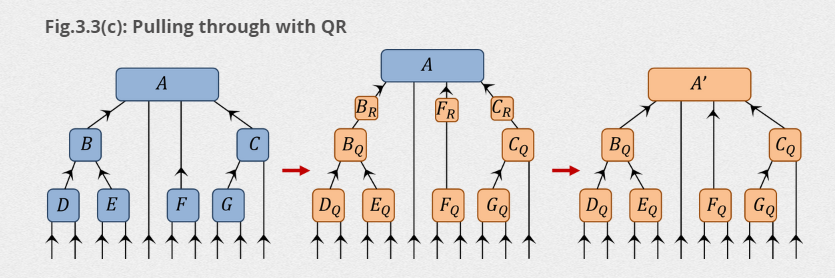

In [4]:
##### Ex.3.3(c): Creating a center of orthogonality by 'pulling through' 
# define tensors
d = 3
A = np.random.rand(d,d,d,d); B = np.random.rand(d,d,d) 
C = np.random.rand(d,d,d); D = np.random.rand(d,d,d) 
E = np.random.rand(d,d,d); F = np.random.rand(d,d,d) 
G = np.random.rand(d,d,d)
# iterate QR decomps
DQ, DR = LA.qr(D.reshape(d**2,d)); DQ = DQ.reshape(d,d,d)
EQ, ER = LA.qr(E.reshape(d**2,d)); EQ = EQ.reshape(d,d,d)
Btilda = ncon([B,DR,ER],[[1,2,-3],[-1,1],[-2,2]])
BQ, BR = LA.qr(Btilda.reshape(d**2,d)); BQ = BQ.reshape(d,d,d)
FQ, FR = LA.qr(F.reshape(d**2,d)); FQ = FQ.reshape(d,d,d)
GQ, GR = LA.qr(G.reshape(d**2,d)); GQ = GQ.reshape(d,d,d)
Ctilda = ncon([C,GR],[[1,-2,-3],[-1,1]])
CQ, CR = LA.qr(Ctilda.reshape(d**2,d)); CQ = CQ.reshape(d,d,d)
Aprime = ncon([A,BR,FR,CR],[[1,-2,2,3],[-1,1],[-3,2],[-4,3]])
# new network is formed from tensors: {Aprime,BQ,CQ,DQ,EQ,FQ,GQ}.

# check both networks evaluate to the same tensor
connectlist = [[3,-5,4,5],[1,2,3],[6,-10,5],[-1,-2,1],[-3,-4,2],[-6,-7,4],[-8,-9,6]]
H0 = ncon([A,B,C,D,E,F,G],connectlist)
H1 = ncon([Aprime,BQ,CQ,DQ,EQ,FQ,GQ],connectlist)
dH = LA.norm(H0-H1) / LA.norm(H0)
dH

7.411912535457474e-16

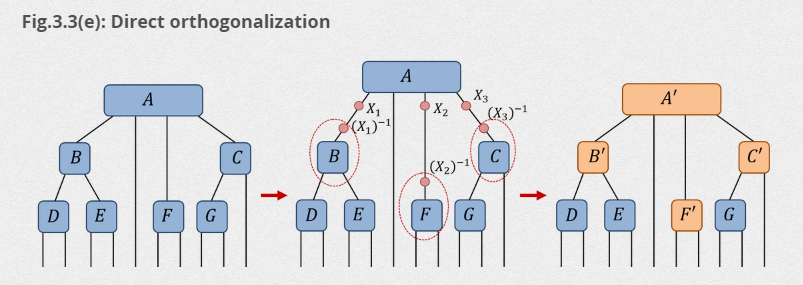

In [5]:
##### Ex.3.3(c): Creating a center of orthogonality with 'direct orthogonalization' 
# define tensors
d = 3
A = np.random.rand(d,d,d,d); B = np.random.rand(d,d,d) 
C = np.random.rand(d,d,d); D = np.random.rand(d,d,d) 
E = np.random.rand(d,d,d); F = np.random.rand(d,d,d) 
G = np.random.rand(d,d,d)
# compute density matrices and their principle square roots
rho1 = ncon([B,D,E,B,D,E],[[5,6,-2],[1,2,5],[3,4,6],[7,8,-1],[1,2,7],[3,4,8]])
rho2 = ncon([F,F],[[1,2,-2],[1,2,-1]])
rho3 = ncon([C,G,C,G],[[3,5,-2],[1,2,3],[4,5,-1],[1,2,4]])
d1, u1 = LA.eigh(rho1); sq_d1 = np.sqrt(abs(d1))
d2, u2 = LA.eigh(rho2); sq_d2 = np.sqrt(abs(d2))
d3, u3 = LA.eigh(rho3); sq_d3 = np.sqrt(abs(d3))
X1 = u1 @ np.diag(sq_d1) @ u1.T; X1inv = u1 @ np.diag(1/sq_d1) @ u1.T
X2 = u2 @ np.diag(sq_d2) @ u2.T; X2inv = u2 @ np.diag(1/sq_d2) @ u2.T
X3 = u3 @ np.diag(sq_d3) @ u3.T; X3inv = u3 @ np.diag(1/sq_d3) @ u3.T
# execute gauge changes
Aprime = ncon([A,X1,X2,X3],[[1,-2,2,3],[-1,1],[-3,2],[-4,3]])
Bprime = ncon([B,X1inv],[[-1,-2,1],[1,-3]])
Fprime = ncon([F,X2inv],[[-1,-2,1],[1,-3]])
Cprime = ncon([C,X3inv],[[-1,-2,1],[1,-3]])
# new network is formed from tensors: {Aprime,Bprime,Cprime,D,E,Fprime,G}

# check both networks evaluate to the same tensor
connectlist = [[3,-5,4,5],[1,2,3],[6,-10,5],[-1,-2,1],[-3,-4,2],[-6,-7,4],[-8,-9,6]]
H0 = ncon([A,B,C,D,E,F,G],connectlist)
H1 = ncon([Aprime,Bprime,Cprime,D,E,Fprime,G],connectlist)
dH = LA.norm(H0 - H1) / LA.norm(H0)
dH

5.552362266037191e-16

# Problem Set

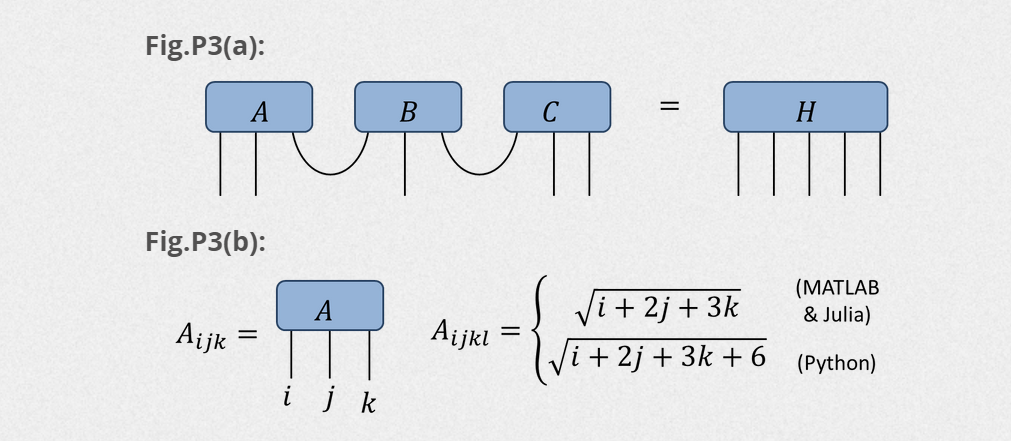

A = B = C; d = 12.

In [6]:
d = 12
A = np.zeros((d,d,d))
for i in range(d):
    for j in range(d):
        for k in range(d):
            A[i,j,k] = np.sqrt(i+2*j+3*k+6)
B = np.copy(A)
C = np.copy(A)
A.shape

(12, 12, 12)

In [7]:
H = ncon([A,B,C],[[-1,-2,1],[1,-3,2],[2,-4,-5]])
H.shape

(12, 12, 12, 12, 12)

In [19]:
LA.norm(H)

17331274.432963643

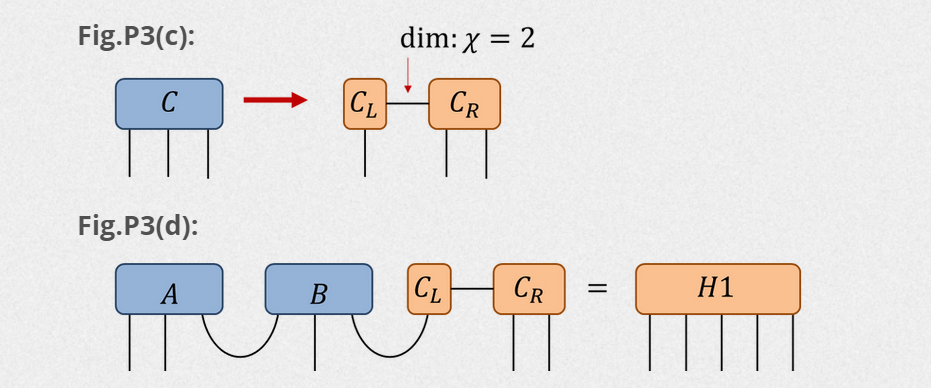

In [13]:
Cp = C.reshape((d,d*d))
Cl,S,Cr = LA.svd(Cp,full_matrices=False) 
print(Cl.shape,Cr.shape)

(12, 12) (12, 144)


In [15]:

Cpp = (Cl[:,:2]@np.diag(S[:2])@Cr[:2,:]).reshape((d,d,d))
Cpp.shape

(12, 12, 12)

In [16]:
H1 = ncon([A,B,Cpp],[[-1,-2,1],[1,-3,2],[2,-4,-5]])

In [20]:
e = LA.norm(H1-H)/LA.norm(H)
e

9.458269336222019e-07

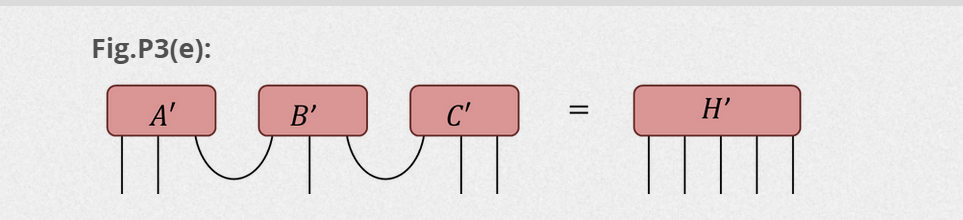

In [21]:
AQ, AR = LA.qr(A.reshape((d*d,d)))
Bp = ncon([AR,B],[[-1,1],[1,-2,-3]])
Bp.shape

(12, 12, 12)

In [37]:
AQp = AQ.reshape((d,d,d))

In [30]:
Bpp = Bp.reshape((d*d,d))
BQ, BR = LA.qr(Bpp)
BQp = BQ.reshape((d,d,d))

In [33]:
Cp = ncon([BR,C],[[-1,1],[1,-2,-3]])

In [34]:
Cp.shape

(12, 12, 12)

In [38]:
Hp = ncon([AQp, BQp, Cp],[[-1,-2,1],[1,-3,2],[2,-4,-5]])

In [39]:
Hp.shape

(12, 12, 12, 12, 12)

In [40]:
LA.norm(Hp-H)

6.6135212870182805e-09

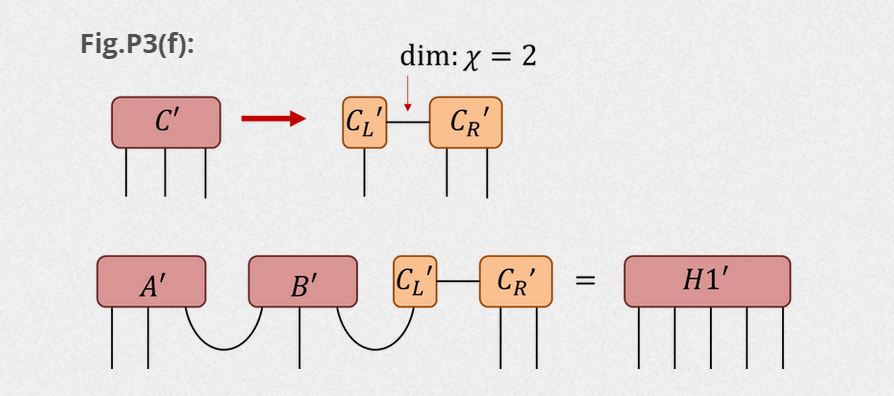

In [41]:
CpL, S, CpR = LA.svd(Cp.reshape((d,d*d)))

In [44]:
Ctilda = (CpL[:,:2]@np.diag(S[:2])@CpR[:2,:]).reshape((d,d,d))
Ctilda.shape

(12, 12, 12)

In [48]:
H1p = ncon([AQp,BQp,Ctilda],[[-1,-2,1],[1,-3,2],[2,-4,-5]])


In [49]:
LA.norm(H1p-H)/LA.norm(H)

1.0618346029836059e-07

# Solutions

In [50]:
##### Problem Set 3 Solutions
import numpy as np
from numpy import linalg as LA
from ncon import ncon # ensure 'ncon.py' in working dir
# define tensors
d = 12
A = np.zeros((d,d,d))
for ni in range(d):
    for nj in range(d):
        for nk in range(d):
            A[ni,nj,nk] = np.sqrt(ni + 2*nj + 3*nk + 6)
        
B = A
C = A

# (a) Evaluate Network
H = ncon([A,B,C],[[-1,-2,1],[1,-3,2],[2,-4,-5]])
nH = LA.norm(H)

# (b) truncated SVD
um,sm,vhm = LA.svd(C.reshape(d,d**2))
chi = 2
CL = um[:,:chi] @ np.diag(np.sqrt(sm[:chi]))
CR = (np.diag(np.sqrt(sm[:chi])) @ vhm[:chi,:]).reshape(chi,d,d)

H1 = ncon([A,B,CL,CR],[[-1,-2,1],[1,-3,2],[2,3],[3,-4,-5]])
err1 = LA.norm(H - H1) / nH

# (c) create center of orthogonality at C
Qm, Rm = LA.qr(A.reshape(d**2,d))
Ap = Qm.reshape(d,d,d)
Qm, Rm = LA.qr((ncon([Rm,B],[[-1,1],[1,-2,-3]])).reshape(d**2,d))
Bp = Qm.reshape(d,d,d)
Cp = ncon([Rm,C],[[-1,1],[1,-2,-3]])
# check result
Hp = ncon([Ap,Bp,Cp],[[-1,-2,1],[1,-3,2],[2,-4,-5]])
errp = LA.norm(H - Hp) / nH # should be zero

# (d) globally optimal truncated SVD
um,sm,vhm = LA.svd(Cp.reshape(d,d**2))
chi = 2
CLp = um[:,:chi] @ np.diag(np.sqrt(sm[:chi]))
CRp = (np.diag(np.sqrt(sm[:chi])) @ vhm[:chi,:]).reshape(chi,d,d)

H1p = ncon([Ap,Bp,CLp,CRp],[[-1,-2,1],[1,-3,2],[2,3],[3,-4,-5]])
err1p = LA.norm(H - H1p) / nH

print('Error (locally optimal): %2.3e, Error (global optimal): %2.3e' % (err1,err1p))

Error (locally optimal): 9.458e-07, Error (global optimal): 1.062e-07
